In [1]:
import pandas as pd
import numpy as np

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,TXKEY,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,T43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,T49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,T29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,T276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,T278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [5]:
train.shape

(199364, 32)

In [6]:
x = train.drop(['TXKEY','Class'],axis=1)

In [7]:
y = train['Class']

## Random Forest

In [10]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=87)

In [11]:
forest = RandomForestClassifier(n_estimators=100,max_depth=45)
forest.fit(X_train,y_train)
y_predict = forest.predict(X_val)
print('F1_score:',f1_score(y_val,y_predict,average=None))

F1_score: [0.99981581 0.87640449]


In [12]:
df_plot = pd.DataFrame({'features': x.columns,
                        'importances': forest.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

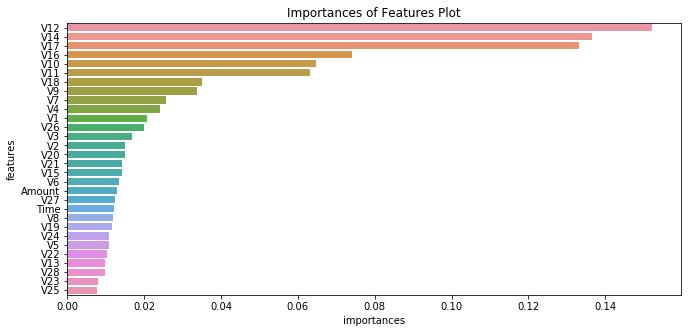

In [15]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [18]:
x = x.drop(df_plot.features[df_plot.importances < 0.01].tolist(),axis=1)
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V24', 'V26', 'V27', 'Amount'],
      dtype='object')

## Xgboost

In [30]:
from xgboost import XGBClassifier

kf = KFold(n_splits=5)
for train_i, test_i in kf.split(x):
    X_train = pd.DataFrame(x.values[train_i],columns=x.columns)
    y_train = pd.DataFrame(y.values[train_i])
    X_val = pd.DataFrame(x.values[test_i],columns=x.columns)
    y_val = pd.DataFrame(y.values[test_i])

    xgbc = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=4, min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27)
    xgbc.fit(X_train,y_train)
    y_predict = xgbc.predict(X_val)
    print(f1_score(y_val,y_predict,average=None))

[0.99977394 0.85245902]
[0.99983675 0.88695652]
[0.99972362 0.84931507]
[0.99978656 0.82828283]
[0.99976135 0.85496183]


## 測試資料

In [21]:
test = pd.read_csv('test_public.csv')

In [22]:
test.shape

(85443, 31)

In [23]:
TXKEY =np.array(test["TXKEY"])
TXKEY

array(['T2', 'T5', 'T7', ..., 'T284797', 'T284800', 'T284802'],
      dtype=object)

In [24]:
len(TXKEY)

85443

In [25]:
x_test = test.drop(['TXKEY'],axis=1)

In [27]:
predictions = xgbc.predict(x_test[x.columns])

In [28]:
my_solution = pd.DataFrame(predictions, TXKEY, columns = ["Class"])
my_solution

,Class
T2,0
T5,0
T7,0
T9,0
T10,0
T13,0
T15,0
T17,0
T18,0
T19,0


In [39]:
my_solution.to_csv("Ans/solution_10.csv", index_label = ["TXKEY"])